In [1]:
import pandas as pd
import requests
from datetime import datetime
import time
import re
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import os
import git

def count_commits(repo_path):
    try:
        # Open the repository using GitPython
        repo = git.Repo(repo_path)
        # Count the number of commits
        return len(list(repo.iter_commits('HEAD')))
    except Exception as e:
        print(f"Error counting commits in {repo_path}: {e}")
        return 0
def get_commit_message(repo_path, commit_id):
    try:
        # Open the repository using GitPython
        repo = git.Repo(repo_path)
        # Get the commit object by ID
        commit = repo.commit(commit_id)
        # Return the commit message
        return commit.message.strip()
    except Exception as e:
        print(f"Error retrieving commit message in {repo_path} for commit {commit_id}: {e}")
        return None
def count_commits_after_date(repo_path, start_date_str):
    try:
        repo = git.Repo(repo_path)
        commits = list(repo.iter_commits('HEAD', since=start_date_str))
        return len(commits)
    except Exception as e:
        print(f"Error counting commits in {repo_path}: {e}")
        return 0

def map_project_name(project_file):
    for repo_name in repo_dict:
        if repo_name in project_file:
            return repo_name
    return None

In [3]:
base_path = 'repositories/'

In [4]:
df_prompt_changes = pd.read_csv("filtered_data/changes_new.csv")
df_parsed_prompts = pd.read_csv("filtered_data/parsed_prompts_2.csv")
df_final = pd.read_csv("final-dataset/full.csv")

df_final.drop_duplicates(subset=['old', 'new'], inplace=True)

repo_dict = df_parsed_prompts['repo_name']
df_prompt_changes['project_name'] = df_prompt_changes['project_file'].apply(map_project_name)

df_final['project_name'] = df_final['project_file'].apply(map_project_name)


In [5]:
len(df_final)

1262

In [6]:
all_repositories = df_final['project_name'].unique()
# store all_repostories to a text file
with open("final-dataset/all_repositories.txt", "w") as f:
    for repo in all_repositories:
        f.write(repo + "\n")

In [7]:
df_prompt_changes['date'] = pd.to_datetime(df_prompt_changes['date'])
earliest_dates = df_prompt_changes.groupby('project_name')['date'].min().dt.strftime('%Y-%m-%d').reset_index()
earliest_dates = earliest_dates.rename(columns={'date': 'first_date'})
df_prompt_changes = pd.merge(df_prompt_changes, earliest_dates, on='project_name', how='left')

In [8]:
df_prompt_changes

,Unnamed: 0,project_file,commit,commit_message,date,old,new,project_name,first_date
0,0,BradyFU/Woodpecker_models/entity_extractor.py,8eef8561a06b056525ad4dc4e7dd1bed3e14436a,update code,2023-10-24,['You are a language assistant that helps to e...,['You are a language assistant that helps to e...,BradyFU/Woodpecker,2023-10-24
1,1,AmineDiro/cria_python/langchain_openai.py,e98ec6e3f907c84ea64ca79f2778b5f36ccb1da6,small fix langchain,2023-08-08,"[""\nUSER: You are a helpful, medical specialis...","[""\nUSER: You are a helpful, medical specialis...",AmineDiro/cria,2023-08-08
2,2,UranusSeven/llama_generative_agent_generative_...,fb169f71f0851167e24186131d9eb368d9268c3e,ENH: better prompts,2023-05-05,['\n{q1}?\nContext from memory:\n{relevant_mem...,['{q1}?\nContext from memory:\n{relevant_memor...,UranusSeven/llama_generative_agent,2023-05-05
3,3,yoheinakajima/babyagi_babycoder/babycoder.py,4d5002262e36a361ef9c4d057989ece22f1ce304,get os name,2023-05-02,['You are an AGI agent responsible for creatin...,['You are an AGI agent responsible for creatin...,yoheinakajima/babyagi,2023-04-03
4,4,juntoku9/edupal_firebase_functions/functions/s...,cc91125ab816f695eb335beb8da9846430cde3c3,some clean up and bug fixes,2023-10-25,"[' you are a happy dog chatting with children,...","[' you are a happy dog chatting with children,...",juntoku9/edupal,2023-10-25
...,...,...,...,...,...,...,...,...,...
1791,1791,sweepai/sweep_sweepai/core/context_pruning.py,bc9bfc0351261b66d9bdcb8b08b27df75f24d712,Feat/fast and better context (#3532),2024-04-11,"['PLACEHOLDERPLACEHOLDER', 'You are a brillian...","['PLACEHOLDERPLACEHOLDER', ""You are a brillian...",sweepai/sweep,2023-07-21
1792,1792,thiswillbeyourgithub/DocToolsLLM_DocToolsLLM.py,fb876ba5fae3e4eff683739f38919c40794eed54,feat: added task==search,2023-12-01,['Given the following conversation and a follo...,['Given the following conversation and a follo...,thiswillbeyourgithub/DocToolsLLM,2023-12-01
1793,1793,thiswillbeyourgithub/DocToolsLLM_DocToolsLLM.py,0802de797b7946e54e55db61f8d40065c00afbc6,fix dedent,2023-12-10,['Given the following conversation and a follo...,['\n Given the followin...,thiswillbeyourgithub/DocToolsLLM,2023-12-01
1794,1794,thiswillbeyourgithub/DocToolsLLM_DocToolsLLM.py,7e22a317e07323fe4c34e0beeecade79576d7a99,feat: allow the llm to give its opinion if the...,2024-05-01,"[""Given the following question and document te...","[""Given the following question and document te...",thiswillbeyourgithub/DocToolsLLM,2023-12-01


***From here on you can use df_prompt_changes for other analysis***

In [9]:
project_counts = df_prompt_changes['project_name'].value_counts().reset_index()
project_counts.columns = ['repository', 'count_prompt_changes']
project_counts = pd.merge(project_counts, earliest_dates.rename(columns={'project_name': 'repository'}), on='repository', how='left')
df_analysis = project_counts.copy()

In [10]:
df_analysis['code_commit_count'] = 0
for index, row in df_analysis.iterrows():
    if pd.notna(row['repository']):
        project_name = row['repository']
        start_date = row['first_date']
        print(project_name)
        repo_path = os.path.join(base_path, project_name)
        if os.path.exists(repo_path):
            code_commit_count = count_commits_after_date(repo_path, start_date)
            df_analysis.at[index, 'code_commit_count'] = code_commit_count - row['count_prompt_changes']
        else:
            print(f"Repository path {repo_path} does not exist.")

Shabang-Systems/simon
sweepai/sweep
RUC-GSAI/YuLan-Rec
robiwan303/babyagi
Saik0s/DevAssistant
openchatai/OpenCopilot
reworkd/AgentGPT
Kav-K/GPTDiscord
haesleinhuepf/bia-bob
microsoft/PubSec-Info-Assistant
langchain-ai/langchain
topoteretes/PromethAI-Backend
refuel-ai/autolabel
explodinggradients/ragas
muellerberndt/mini-agi
yoheinakajima/babyagi
akshata29/entaoai
handrew/browserpilot
pyspark-ai/pyspark-ai
PrefectHQ/marvin
aws-samples/aws-genai-llm-chatbot
Farama-Foundation/chatarena
IvanIsCoding/ResuLLMe
bhargaviparanjape/language-programmes
gpt-engineer-org/gpt-engineer
sotopia-lab/sotopia
Dataherald/dataherald
michaelthwan/searchGPT
ur-whitelab/md-agent
natolambert/interconnects-tools
YiVal/YiVal
sgreenb/pico_assistant
unconv/gpt-autopilot
run-llama/llama_index
truera/trulens
OoriData/OgbujiPT
langchain-ai/auto-evaluator
mlflow/mlflow
siddhartha-gadgil/LeanAide
voxel51/voxelgpt
tom-doerr/zsh_codex
totalhack/zillion
dory111111/babyagi-streamlit
yasyf/compress-gpt
junhoyeo/BetterOCR
an

In [11]:
df_analysis

,repository,count_prompt_changes,first_date,code_commit_count
0,Shabang-Systems/simon,65,2023-07-03,254
1,sweepai/sweep,60,2023-07-21,8659
2,RUC-GSAI/YuLan-Rec,44,2023-06-13,111
3,robiwan303/babyagi,41,2023-04-03,546
4,Saik0s/DevAssistant,38,2023-04-10,22
...,...,...,...,...
322,peterw/Gumroad-Landing-Page-Generator,1,2023-04-21,1
323,hhaAndroid/awesome-mm-chat,1,2023-05-22,51
324,hpcaitech/ColossalAI,1,2024-03-12,465
325,samadpls/Querypls,1,2024-07-28,0


In [12]:
filtered_df = df_analysis.copy()
filtered_df['total_changes'] = filtered_df['count_prompt_changes'] + filtered_df['code_commit_count']
filtered_df = filtered_df[filtered_df['total_changes'] > 0]
filtered_df['prompt_change_frequency'] = filtered_df['count_prompt_changes'] / filtered_df['total_changes']
filtered_df['code_change_frequency'] = filtered_df['code_commit_count'] / filtered_df['total_changes']

In [13]:
average_frequencies = {
    'Prompt Changes': filtered_df['prompt_change_frequency'].mean(),
    'Code Changes': filtered_df['code_change_frequency'].mean(),
}

# Calculate median values
median_frequencies = {
    'Prompt Changes': filtered_df['prompt_change_frequency'].median(),
    'Code Changes': filtered_df['code_change_frequency'].median(),
}

In [ ]:
print(average_frequencies)
print(median_frequencies)

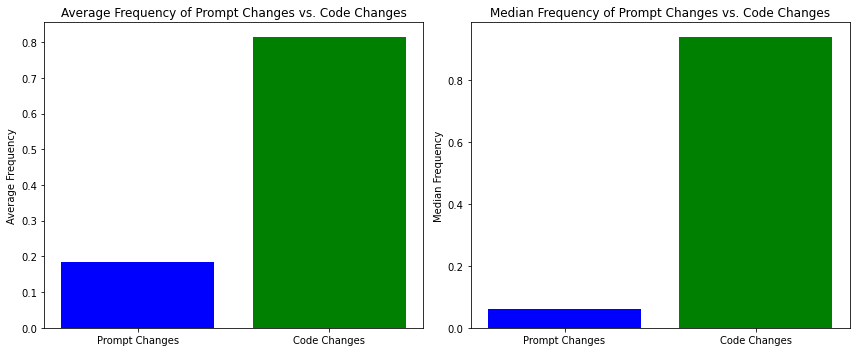

In [23]:
labels = list(average_frequencies.keys())
average_values = list(average_frequencies.values())
median_values = list(median_frequencies.values())

# Create a figure and two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the mean values
axes[0].bar(labels, average_values, color=['blue', 'green'])
axes[0].set_ylabel('Average Frequency')
axes[0].set_title('Average Frequency of Prompt Changes vs. Code Changes')

# Plot the median values
axes[1].bar(labels, median_values, color=['blue', 'green'])
axes[1].set_ylabel('Median Frequency')
axes[1].set_title('Median Frequency of Prompt Changes vs. Code Changes')

# Show the plots
plt.tight_layout()
plt.show()

In [65]:
df_filtered = df_prompt_changes.copy()
df_filtered

,Unnamed: 0,project_file,commit,commit_message,date,old,new,project_name,first_date
0,0,BradyFU/Woodpecker_models/entity_extractor.py,8eef8561a06b056525ad4dc4e7dd1bed3e14436a,update code,2023-10-24,['You are a language assistant that helps to e...,['You are a language assistant that helps to e...,BradyFU/Woodpecker,2023-10-24
1,1,AmineDiro/cria_python/langchain_openai.py,e98ec6e3f907c84ea64ca79f2778b5f36ccb1da6,small fix langchain,2023-08-08,"[""\nUSER: You are a helpful, medical specialis...","[""\nUSER: You are a helpful, medical specialis...",AmineDiro/cria,2023-08-08
2,2,UranusSeven/llama_generative_agent_generative_...,fb169f71f0851167e24186131d9eb368d9268c3e,ENH: better prompts,2023-05-05,['\n{q1}?\nContext from memory:\n{relevant_mem...,['{q1}?\nContext from memory:\n{relevant_memor...,UranusSeven/llama_generative_agent,2023-05-05
3,3,yoheinakajima/babyagi_babycoder/babycoder.py,4d5002262e36a361ef9c4d057989ece22f1ce304,get os name,2023-05-02,['You are an AGI agent responsible for creatin...,['You are an AGI agent responsible for creatin...,yoheinakajima/babyagi,2023-04-03
4,4,juntoku9/edupal_firebase_functions/functions/s...,cc91125ab816f695eb335beb8da9846430cde3c3,some clean up and bug fixes,2023-10-25,"[' you are a happy dog chatting with children,...","[' you are a happy dog chatting with children,...",juntoku9/edupal,2023-10-25
...,...,...,...,...,...,...,...,...,...
1791,1791,sweepai/sweep_sweepai/core/context_pruning.py,bc9bfc0351261b66d9bdcb8b08b27df75f24d712,Feat/fast and better context (#3532),2024-04-11,"['PLACEHOLDERPLACEHOLDER', 'You are a brillian...","['PLACEHOLDERPLACEHOLDER', ""You are a brillian...",sweepai/sweep,2023-07-21
1792,1792,thiswillbeyourgithub/DocToolsLLM_DocToolsLLM.py,fb876ba5fae3e4eff683739f38919c40794eed54,feat: added task==search,2023-12-01,['Given the following conversation and a follo...,['Given the following conversation and a follo...,thiswillbeyourgithub/DocToolsLLM,2023-12-01
1793,1793,thiswillbeyourgithub/DocToolsLLM_DocToolsLLM.py,0802de797b7946e54e55db61f8d40065c00afbc6,fix dedent,2023-12-10,['Given the following conversation and a follo...,['\n Given the followin...,thiswillbeyourgithub/DocToolsLLM,2023-12-01
1794,1794,thiswillbeyourgithub/DocToolsLLM_DocToolsLLM.py,7e22a317e07323fe4c34e0beeecade79576d7a99,feat: allow the llm to give its opinion if the...,2024-05-01,"[""Given the following question and document te...","[""Given the following question and document te...",thiswillbeyourgithub/DocToolsLLM,2023-12-01


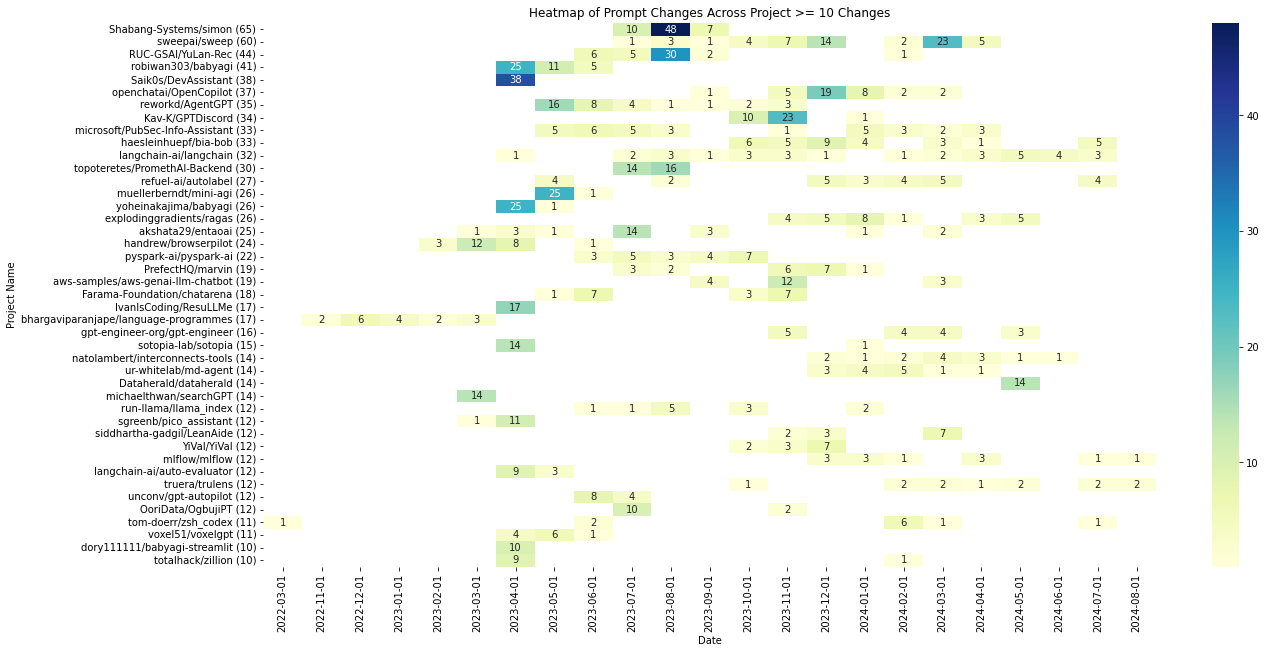

In [68]:
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Create a new column that combines year and month for grouping
df_filtered['year_month'] = df_filtered['date'].dt.to_period('M')

total_changes = df_filtered.groupby(['project_name']).size()

filtered_projects = total_changes[total_changes >= 10].index
df_filtered = df_filtered[df_filtered['project_name'].isin(filtered_projects)]

# Group by year_month and project_name to count the number of changes
heatmap_data = df_filtered.groupby(['year_month', 'project_name']).size().unstack(fill_value=0)

heatmap_data = heatmap_data.loc[:, total_changes[filtered_projects].sort_values(ascending=False).index]
heatmap_data.columns = [f"{col} ({total_changes[col]})" for col in heatmap_data.columns]

# Convert year_month back to datetime for plotting
heatmap_data.index = heatmap_data.index.to_timestamp()

mask = heatmap_data == 0

annot_data = heatmap_data.T.where(heatmap_data.T > 0).fillna(0).astype(int)

# Plotting the heatmap with annotations, excluding zeros
plt.figure(figsize=(20, 10))

ax = sns.heatmap(heatmap_data.T, cmap='YlGnBu', annot=annot_data.where(annot_data > 0), fmt="g", cbar=True, mask=mask.T)
ax.set_xticklabels(heatmap_data.index.strftime('%Y-%m-%d'))


plt.title('Heatmap of Prompt Changes Across Project >= 10 Changes')
plt.xlabel('Date')
plt.ylabel('Project Name')
plt.show()

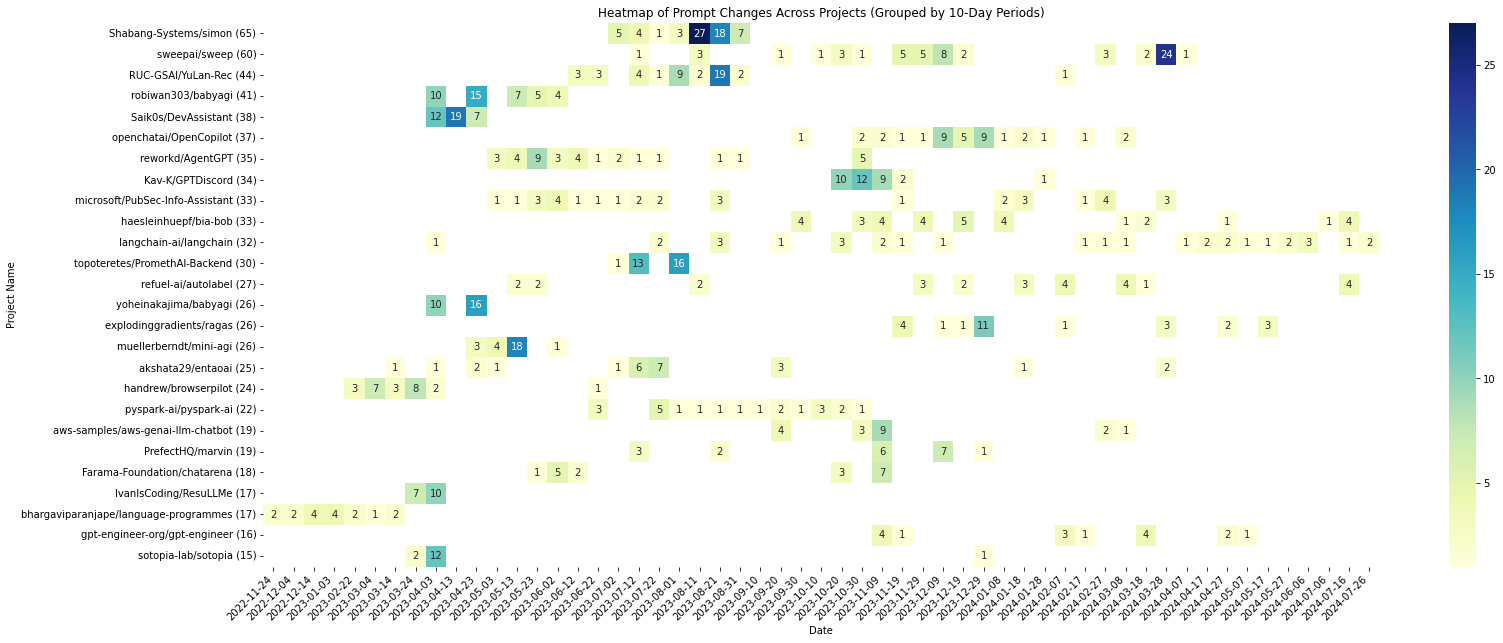

In [72]:
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Group by project_name to count the total number of changes
total_changes = df_filtered.groupby(['project_name']).size()

# Filter out projects with fewer than 10 changes
filtered_projects = total_changes[total_changes >= 15].index
df_filtered = df_filtered[df_filtered['project_name'].isin(filtered_projects)]

# Create a new column for 10-day periods
df_filtered['date_10days'] = (df_filtered['date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('10D')

# Group by 10-day periods and project_name to count the number of changes
heatmap_data = df_filtered.groupby(['date_10days', 'project_name']).size().unstack(fill_value=0)

# Convert the 10-day period number back to a date for labeling
heatmap_data.index = pd.to_datetime(heatmap_data.index * 10, origin='1970-01-01', unit='D')

# Sort the heatmap data based on the total number of changes per project
heatmap_data = heatmap_data.loc[:, total_changes[filtered_projects].sort_values(ascending=False).index]

# Rename the columns to include the number of changes
heatmap_data.columns = [f"{col} ({total_changes[col]})" for col in heatmap_data.columns]

# Create a mask to hide zero values in the annotation
mask = heatmap_data == 0

# Fill NaN values with 0 before converting to integers
annot_data = heatmap_data.T.where(heatmap_data.T > 0).fillna(0).astype(int)

# Plotting the heatmap with annotations, excluding zeros
plt.figure(figsize=(25, 10))

ax = sns.heatmap(heatmap_data.T, cmap='YlGnBu', annot=annot_data.where(annot_data > 0), fmt="g", cbar=True, mask=mask.T)

# Format the x-axis labels to show the date in YYYY-MM-DD format for the 10-day periods
ax.set_xticklabels(heatmap_data.index.strftime('%Y-%m-%d'))

plt.title('Heatmap of Prompt Changes Across Projects (Grouped by 10-Day Periods)')
plt.xlabel('Date')
plt.ylabel('Project Name')
plt.xticks(rotation=45, ha='right')  # Rotate the dates for better readability
plt.show()


In [25]:
df_filtered['commit_date'] = pd.to_datetime(df_filtered['date'], format='%Y-%m-%d')  # Adjust format as needed
df_filtered['time_diff'] = df_filtered.groupby(['project_name', 'project_file'])['commit_date'].diff().dt.days

In [37]:
average_time_diff = df_filtered.groupby(['project_name', 'project_file'])['time_diff'].mean().reset_index()
average_time_diff.columns = ['project_name', 'project_file', 'average_time_diff_days']

average_time_diff_per_project = average_time_diff.groupby('project_name')['average_time_diff_days'].mean().reset_index().dropna()
average_time_diff_per_project.columns = ['project_name', 'average_time_diff_days']
overall_average_time_diff = average_time_diff_per_project['average_time_diff_days'].mean()

median_time_diff_per_project = df_filtered.groupby('project_name')['time_diff'].median().reset_index().dropna()
median_time_diff_per_project.columns = ['project_name', 'median_time_diff_days']
overall_median_time_diff = median_time_diff_per_project['median_time_diff_days'].median()

In [40]:
print(overall_average_time_diff)
print(overall_median_time_diff)

25.46988115625897
3.75


In [10]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def calculate_token_diff_bert(old_text, new_text):
    old_tokens = set(tokenizer.tokenize(old_text))
    new_tokens = set(tokenizer.tokenize(new_text))
    
    # Tokens added and removed
    tokens_added = new_tokens - old_tokens
    tokens_removed = old_tokens - new_tokens
    
    # Change size is the total number of tokens added and removed
    change_size = len(tokens_added) + len(tokens_removed)
    return change_size

/home/mtafresh/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
changes_df = pd.read_csv("output_7_15.csv")
changes_df = changes_df.dropna(subset=['old', 'new'])
changes_df = changes_df.drop_duplicates(subset=['old', 'new'])

In [24]:
changes_df['change_size'] = changes_df.apply(lambda row: calculate_token_diff_bert(row['old'], row['new']), axis=1)

In [25]:
changes_df['project_name'] = changes_df['project_file'].apply(map_project_name)
changes_df

,project_file,commit,commit_message,date,old,new,similarity,prompt_length_old,prompt_length_new,change_size,project_name
0,BradyFU/Woodpecker_models/entity_extractor.py,8eef8561a06b056525ad4dc4e7dd1bed3e14436a,update code,2023-10-24,"Given a sentence, extract the existent entitie...","Given a sentence, extract the entities within ...",0.851541,192.0,155.0,24,BradyFU/Woodpecker
1,AmineDiro/cria_python/langchain_openai.py,e98ec6e3f907c84ea64ca79f2778b5f36ccb1da6,small fix langchain,2023-08-08,"\nUSER: You are a helpful, medical specialist....","\nUSER: You are a helpful, medical specialist....",0.985507,68.0,68.0,5,AmineDiro/cria
2,yoheinakajima/babyagi_babycoder/babycoder.py,4d5002262e36a361ef9c4d057989ece22f1ce304,get os name,2023-05-02,You are an AGI agent responsible for executing...,You are an AGI agent responsible for executing...,0.976562,124.0,124.0,1,yoheinakajima/babyagi
3,juntoku9/edupal_firebase_functions/functions/s...,cc91125ab816f695eb335beb8da9846430cde3c3,some clean up and bug fixes,2023-10-25,"you are a happy dog chatting with children, y...","you are a happy dog chatting with children, y...",0.965517,29.0,29.0,2,juntoku9/edupal
4,juntoku9/edupal_firebase_functions/functions/s...,cc91125ab816f695eb335beb8da9846430cde3c3,some clean up and bug fixes,2023-10-25,"you are a stray cat on the streets, you wnat ...","you are a stray cat on the streets, you want ...",0.965517,29.0,29.0,2,juntoku9/edupal
...,...,...,...,...,...,...,...,...,...,...,...
1341,sweepai/sweep_sweepai/core/context_pruning.py,bc9bfc0351261b66d9bdcb8b08b27df75f24d712,Feat/fast and better context (#3532),2024-04-11,## Stored Files\nHere are the files that you h...,## Stored Files\nDO NOT CALL THE STORE OR VIEW...,0.633333,20.0,30.0,20,sweepai/sweep
1342,sweepai/sweep_sweepai/core/context_pruning.py,bc9bfc0351261b66d9bdcb8b08b27df75f24d712,Feat/fast and better context (#3532),2024-04-11,You are a brilliant engineer assigned to solve...,You are a brilliant engineer assigned to solve...,0.488812,290.0,281.0,105,sweepai/sweep
1343,thiswillbeyourgithub/DocToolsLLM_DocToolsLLM.py,7e22a317e07323fe4c34e0beeecade79576d7a99,feat: allow the llm to give its opinion if the...,2024-05-01,"Given the following question and answers, you ...","Given the following question and answers, you ...",0.723077,46.0,82.0,21,thiswillbeyourgithub/DocToolsLLM
1344,thiswillbeyourgithub/DocToolsLLM_DocToolsLLM.py,af87e516db34b996c6daead53b12f38d0ac1beca,remove irrelevant context when combining answers,2024-05-01,You are an assistant for question-answering ta...,You are an assistant for question-answering ta...,0.958333,48.0,50.0,2,thiswillbeyourgithub/DocToolsLLM


In [29]:
temp_df = changes_df[changes_df['project_file'].duplicated(keep=False)]

# Step 2: Group by project_file and sort each group by date
result_df = temp_df.groupby('project_file').apply(lambda x: x.sort_values(by='date')).reset_index(drop=True)
# Trim whitespace from the old column
result_df['new'] = result_df['new'].apply(lambda x: x.strip())
result_df['old'] = result_df['old'].apply(lambda x: x.strip())
# Display the result
result_df.drop_duplicates(subset=['commit'])

result_df.to_csv("filtered_data/multiple_changes_7_15.csv", index=False)

In [7]:
temp_df = pd.read_csv("./filtered_data/initial_coded.csv")
temp_df = temp_df[temp_df['project_file'].duplicated(keep=False)]
result_df = temp_df.groupby('project_file').apply(lambda x: x.sort_values(by='date')).reset_index(drop=True)
result_df.drop_duplicates(subset=['commit'])
result_df.to_csv("filtered_data/multiple_coded.csv", index=False)

result_df

,project_file,commit,commit_message,date,old,new,similarity,length_old,length_new,Type,Code,code(Aaron),Final Code,Comment,Agreement
0,IvanIsCoding/ResuLLMe_src/prompt_engineering/_...,78479e2abf3641ce46aba284f22a95555b4a2da3,Rename Render_JSON_Resume,2023-04-02,You are a career advisor at the Harvard Extens...,You are a career adviser at the Harvard Extens...,0.93,157.0,152.0,Modification,Instruction Modification,"context modification, output instructions modi...",Instruction Modification\nContext Removal,NaN,False
1,IvanIsCoding/ResuLLMe_src/prompt_engineering/_...,4696c2f64686ac21e567bc04eab54dc2361d97ac,Still playing with the work prompt,2023-04-03,You are a career adviser at the Harvard Extens...,You are a career adviser at the Harvard Extens...,0.94,377.0,414.0,Addition,Output Instruction Addition,output instructions modification,Emphasis Addition,Include/Exclude,False
2,IvanIsCoding/ResuLLMe_src/prompt_engineering/_...,4227c546bd5cd02d147240b0c4551d3c5b002f36,Switch all prompts to TypeScript interface,2023-04-11,You are a career adviser at the Harvard Extens...,You are going to write a JSON resume section f...,0.50,152.0,76.0,NaN,Output Format Modificaiton,"Persona Removal, Task Transformation, Template...",Persona Removal\nOutput Instruction Modification,NaN,False
3,IvanIsCoding/ResuLLMe_src/prompt_engineering/_...,4227c546bd5cd02d147240b0c4551d3c5b002f36,Switch all prompts to TypeScript interface,2023-04-11,You are a career adviser at the Harvard Extens...,You are going to write a JSON resume section f...,0.49,186.0,72.0,NaN,Persona Modification\nOutput Format Modificaiton,NaN,Persona Removal\nOutput Instruction Modification,NaN,False
4,Kav-K/GPTDiscord_cogs/code_interpreter_service...,e89fe0919f05e3ee1c9d580a9705989315550a9e,"artifact fixes, some stability improvements fo...",2023-10-28,You are an expert programmer that is able to u...,You are an expert programmer that is able to u...,0.98,198.0,208.0,Addition,Instruction Addition,task instruction modification,Emphasis Addition,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,truera/trulens_trulens_eval/trulens_eval/feedb...,9c0be9d9f7ec8a22d43e3f6224672d289fbdb3cc,Feedback upgrades (#1018)\n\n* split prompts\n...,2024-03-22,"For a PROMPT and a RESPONSE, score whether new...","For a PROMPT and a RESPONSE, score whether new...",0.97,75.0,71.0,Removal,Context Removal,aesthetic changes,Context Removal,The context is moved to another prompt,False
122,truera/trulens_trulens_eval/trulens_eval/feedb...,170f5846540075d85e892239c0af2fb24a4af147,Improve handling of abstention for groundednes...,2024-07-25,SOURCE: {premise}\n \n Hypothesi...,SOURCE: {premise}\n \n Hypothesi...,0.93,69.0,80.0,Addition,Output Instruction Addition,"aesthetic changes, output instructions modific...",Output Instruction Addition,Case Handling,False
123,truera/trulens_trulens_eval/trulens_eval/feedb...,58bc3f47907559fadfb49b5c9896e5448859cbc8,[SNOW-1531256] Benchmarking - meta-evaluation ...,2024-08-06,You are a RELEVANCE grader; providing the rele...,You are a RELEVANCE grader; providing the rele...,0.41,248.0,78.0,NaN,"Similar Task, Significant Modifications","Parametrization, Example Removal",Prompt Parameterization\nInstruction Modification,NaN,False
124,voxel51/voxelgpt_links/dataset_view_generator.py,1fdfde421c967f1e358e77693e5f9231dce7c7bd,Haven't tested yet. Combining all runs!,2023-04-18,A text_similarity brain run determines determi...,A text_similarity run determines determines ho...,0.97,45.0,42.0,Removal,Term Removal,rephrase,Term Removal,NaN,False


In [ ]:
temp_df = df_prompt_changes[df_prompt_changes['project_file'].duplicated(keep=False)]

# Step 2: Group by project_file and sort each group by date
result_df = temp_df.groupby('project_file').apply(lambda x: x.sort_values(by='date')).reset_index(drop=True)
# Trim whitespace from the old column
# Display the result
result_df.drop_duplicates(subset=['commit'])

result_df

In [9]:
print(len(result_df['project_file'].unique()))

result_df_2 = temp_df.groupby('project_file').count()

38


In [15]:
# calculate the average of a column "commit" in result_df_2
average_commit = result_df_2['commit'].median()
print(average_commit)

2.0


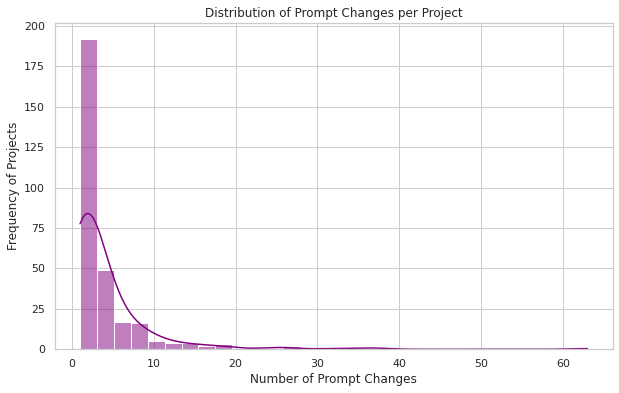

In [151]:
prompt_changes_per_project = changes_df.groupby('project_name').size()

sns.set(style="whitegrid")

# Plot the distribution of prompt changes per project using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(prompt_changes_per_project, bins=30, kde=True, color='purple')

# Add titles and labels
plt.title('Distribution of Prompt Changes per Project')
plt.xlabel('Number of Prompt Changes')
plt.ylabel('Frequency of Projects')

# Show the plot
plt.show()

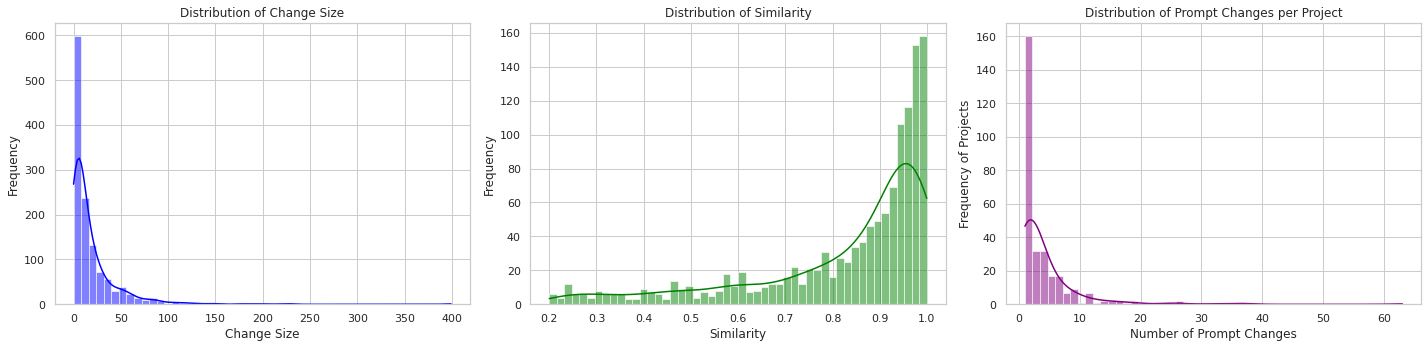

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_filtered is your DataFrame and it contains 'change_size' and 'similarity' columns

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with two subplots
plt.figure(figsize=(24, 6))

plt.subplot(1, 3, 1)
sns.histplot(changes_df['change_size'], bins=50, kde=True, color='blue')
plt.title('Distribution of Change Size')
plt.xlabel('Change Size')
plt.ylabel('Frequency')

# 2. Distribution of similarity
plt.subplot(1, 3, 2)
sns.histplot(changes_df['similarity'], bins=50, kde=True, color='green')
plt.title('Distribution of Similarity')
plt.xlabel('Similarity')
plt.ylabel('Frequency')

# 3. Distribution of prompt changes per project with annotations
prompt_changes_per_project = changes_df.groupby('project_name').size()
plt.subplot(1, 3, 3)
histplot = sns.histplot(prompt_changes_per_project, bins=50, kde=True, color='purple')
plt.title('Distribution of Prompt Changes per Project')
plt.xlabel('Number of Prompt Changes')
plt.ylabel('Frequency of Projects')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plots
plt.show()


In [122]:
def categorize_commit_message(message):
    message = message.lower()

    if re.search(r'\b(fix|bug|patch|resolve|repair|correct)\b', message):
        return "bug fix"
    elif re.search(r'\b(add|implement|feature|introduce|create)\b', message):
        return "feature"
    elif re.search(r'\b(refactor|restructure|clean|reorganize|optimize)\b', message):
        return "refactor"
    elif re.search(r'\b(doc|comment|documentation|readme)\b', message):
        return "documentation"
    else:
        return "other"
    
changes_df['commit_category'] = changes_df['commit_message'].apply(categorize_commit_message)


In [137]:
changes_df

,project_file,commit,commit_message,date,old,new,similarity,prompt_length_old,prompt_length_new,change_size,commit_category
0,BradyFU/Woodpecker_models/entity_extractor.py,8eef8561a06b056525ad4dc4e7dd1bed3e14436a,update code,2023-10-24,"Given a sentence, extract the existent entitie...","Given a sentence, extract the entities within ...",0.851541,192.0,155.0,24,other
1,AmineDiro/cria_python/langchain_openai.py,e98ec6e3f907c84ea64ca79f2778b5f36ccb1da6,small fix langchain,2023-08-08,"\nUSER: You are a helpful, medical specialist....","\nUSER: You are a helpful, medical specialist....",0.985507,68.0,68.0,5,bug fix
2,yoheinakajima/babyagi_babycoder/babycoder.py,4d5002262e36a361ef9c4d057989ece22f1ce304,get os name,2023-05-02,You are an AGI agent responsible for executing...,You are an AGI agent responsible for executing...,0.976562,124.0,124.0,1,other
3,juntoku9/edupal_firebase_functions/functions/s...,cc91125ab816f695eb335beb8da9846430cde3c3,some clean up and bug fixes,2023-10-25,"you are a happy dog chatting with children, y...","you are a happy dog chatting with children, y...",0.965517,29.0,29.0,2,bug fix
4,juntoku9/edupal_firebase_functions/functions/s...,cc91125ab816f695eb335beb8da9846430cde3c3,some clean up and bug fixes,2023-10-25,"you are a stray cat on the streets, you wnat ...","you are a stray cat on the streets, you want ...",0.965517,29.0,29.0,2,bug fix
...,...,...,...,...,...,...,...,...,...,...,...
1341,sweepai/sweep_sweepai/core/context_pruning.py,bc9bfc0351261b66d9bdcb8b08b27df75f24d712,Feat/fast and better context (#3532),2024-04-11,## Stored Files\nHere are the files that you h...,## Stored Files\nDO NOT CALL THE STORE OR VIEW...,0.633333,20.0,30.0,20,other
1342,sweepai/sweep_sweepai/core/context_pruning.py,bc9bfc0351261b66d9bdcb8b08b27df75f24d712,Feat/fast and better context (#3532),2024-04-11,You are a brilliant engineer assigned to solve...,You are a brilliant engineer assigned to solve...,0.488812,290.0,281.0,105,other
1343,thiswillbeyourgithub/DocToolsLLM_DocToolsLLM.py,7e22a317e07323fe4c34e0beeecade79576d7a99,feat: allow the llm to give its opinion if the...,2024-05-01,"Given the following question and answers, you ...","Given the following question and answers, you ...",0.723077,46.0,82.0,21,other
1344,thiswillbeyourgithub/DocToolsLLM_DocToolsLLM.py,af87e516db34b996c6daead53b12f38d0ac1beca,remove irrelevant context when combining answers,2024-05-01,You are an assistant for question-answering ta...,You are an assistant for question-answering ta...,0.958333,48.0,50.0,2,other


In [128]:
df_filtered = df_prompt_changes.copy()
df_filtered

,Unnamed: 0,project_file,commit,commit_message,date,old,new,project_name,first_date
0,0,BradyFU/Woodpecker_models/entity_extractor.py,8eef8561a06b056525ad4dc4e7dd1bed3e14436a,update code,2023-10-24,['You are a language assistant that helps to e...,['You are a language assistant that helps to e...,BradyFU/Woodpecker,2023-10-24
1,1,AmineDiro/cria_python/langchain_openai.py,e98ec6e3f907c84ea64ca79f2778b5f36ccb1da6,small fix langchain,2023-08-08,"[""\nUSER: You are a helpful, medical specialis...","[""\nUSER: You are a helpful, medical specialis...",AmineDiro/cria,2023-08-08
2,2,UranusSeven/llama_generative_agent_generative_...,fb169f71f0851167e24186131d9eb368d9268c3e,ENH: better prompts,2023-05-05,['\n{q1}?\nContext from memory:\n{relevant_mem...,['{q1}?\nContext from memory:\n{relevant_memor...,UranusSeven/llama_generative_agent,2023-05-05
3,3,yoheinakajima/babyagi_babycoder/babycoder.py,4d5002262e36a361ef9c4d057989ece22f1ce304,get os name,2023-05-02,['You are an AGI agent responsible for creatin...,['You are an AGI agent responsible for creatin...,yoheinakajima/babyagi,2023-04-03
4,4,juntoku9/edupal_firebase_functions/functions/s...,cc91125ab816f695eb335beb8da9846430cde3c3,some clean up and bug fixes,2023-10-25,"[' you are a happy dog chatting with children,...","[' you are a happy dog chatting with children,...",juntoku9/edupal,2023-10-25
...,...,...,...,...,...,...,...,...,...
1791,1791,sweepai/sweep_sweepai/core/context_pruning.py,bc9bfc0351261b66d9bdcb8b08b27df75f24d712,Feat/fast and better context (#3532),2024-04-11,"['PLACEHOLDERPLACEHOLDER', 'You are a brillian...","['PLACEHOLDERPLACEHOLDER', ""You are a brillian...",sweepai/sweep,2023-07-21
1792,1792,thiswillbeyourgithub/DocToolsLLM_DocToolsLLM.py,fb876ba5fae3e4eff683739f38919c40794eed54,feat: added task==search,2023-12-01,['Given the following conversation and a follo...,['Given the following conversation and a follo...,thiswillbeyourgithub/DocToolsLLM,2023-12-01
1793,1793,thiswillbeyourgithub/DocToolsLLM_DocToolsLLM.py,0802de797b7946e54e55db61f8d40065c00afbc6,fix dedent,2023-12-10,['Given the following conversation and a follo...,['\n Given the followin...,thiswillbeyourgithub/DocToolsLLM,2023-12-01
1794,1794,thiswillbeyourgithub/DocToolsLLM_DocToolsLLM.py,7e22a317e07323fe4c34e0beeecade79576d7a99,feat: allow the llm to give its opinion if the...,2024-05-01,"[""Given the following question and document te...","[""Given the following question and document te...",thiswillbeyourgithub/DocToolsLLM,2023-12-01


In [1]:
import difflib
from pathlib import Path
from bs4 import BeautifulSoup

In [33]:
def create_diff(text1, text2):
    html_diff = difflib.HtmlDiff().make_file(text1, text2)
    soup = BeautifulSoup(html_diff, 'html.parser')

    for td in soup.find_all('td', nowrap=True):
    # Remove the 'nowrap' attribute
        del td['nowrap']
        td['style'] = "word-wrap: break-word; word-break: break-all; white-space: normal;"

    for table in soup.find_all('table', class_='diff'):
        table['style'] = "font-family:Courier; border:medium;"

    for header in soup.find_all(class_='diff_header'):
        header['style'] = "background-color:#e0e0e0; text-align:right;"

    for next_elem in soup.find_all(class_='diff_next'):
        next_elem['style'] = "background-color:#c0c0c0;"

    for add_elem in soup.find_all(class_='diff_add'):
        add_elem['style'] = "background-color:#aaffaa;"

    for chg_elem in soup.find_all(class_='diff_chg'):
        chg_elem['style'] = "background-color:#ffff77;"

    for sub_elem in soup.find_all(class_='diff_sub'):
        sub_elem['style'] = "background-color:#ffaaaa;"

    # # Remove the the table with summary="Legend" attribute
    for legend in soup.find_all('table', summary='Legends'):
        legend.decompose()
    return soup.prettify()


In [34]:
df = pd.read_csv("output_7_15.csv")
df = df.drop_duplicates(subset=['old', 'new'])

In [35]:
for index, row in df.iterrows():
    print(index)
    diff_html = create_diff(row['old'].splitlines(), row['new'].splitlines())
    df.at[index, 'diff_html'] = diff_html

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
2

In [38]:
df.to_csv("output_7_15_temp.csv", index=False)

You are an AI assistant. I will provide you with the title and abstract of a paper and ask for your help to analyze its relevance to general object detection, which includes object detection, instance segmentation, and semantic segmentation tasks. 
The relevance is divided into three levels: 

1. highly relevant. It's means that the paper's title or abstract includes relevant datasets such as COCO, LVIS, Objects365, and Open Images.
2. moderately relevant. It's means that it includes general object detection but also some additional irrelevant information.
3. not relevant. It's means that it includes mostly content unrelated to general object detection tasks.

Your output format must be one of the following and do not output anything else: [highly relevant], [moderately relevant], [not relevant]. 

title is : 
abstract is : 

--------------
You are an AI assistant. I will provide you with the title and abstract of a paper and ask for your help to analyze its relevance to general object